In [23]:
import numpy as np
import scipy
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import math
import matplotlib.pyplot as plt

# Experiment 3 

In [24]:
pressure_room = 101180 # in Pascals
volume_canister = 184*10**-6 # in m^3
volume_connection_tubing = 17.8*10**-6 # in m^3
volume_connection_tubing_at_bottom = 2.53*10**-6
volume_canister = 184*10**-6
volume_of_empty_space_in_chamber = 4.15*10**-6
radius_chamber = 3.25 * 10**-2 # in meters
area_of_chamber_top = np.pi*(0.0325/2)**2 # Area in m^2
r = 8.314 #J K^-1 mol^-1
Na = (6.022*10**23)
kb = (1.38*10**-23)

In [25]:
def moles(initial_height):
    total_volume = volume(initial_height)
    moles_total = total_volume/22.4
    return moles_total

In [26]:
def volume(h):
    volume_of_gas_in_can = np.pi*(radius_chamber/2)**2*h
    total_volume = volume_connection_tubing + volume_connection_tubing_at_bottom + volume_of_gas_in_can + volume_canister + volume_of_empty_space_in_chamber#Overall volume of gas in  m^3
    total_volume = total_volume*1000
    return total_volume # Litres

In [27]:
def function(height, temp, mass):
    h = 47*10**-3 #in meters
    moles_of_gas = moles(h)
    force = mass*0.009806652 #Force in Newtons
    pressure_weights = force/area_of_chamber_top #N/m^2
    pressure_low = pressure_room 
    pressure_high = pressure_weights+pressure_room
    pressure_ratio = (pressure_high)/pressure_low
    temp_change = max(temp)-min(temp)
    thermodynamic_work = moles_of_gas * 8.31 * temp_change * np.log(pressure_ratio)
    average_pressure = (pressure_room + pressure_low)/2
    return thermodynamic_work, average_pressure, pressure_high, pressure_low


In [28]:

def plot(height, temp, mass):
    thermodynamic_work, average_pressure, pressure_high, pressure_low = function(height, temp, mass)
    vol = volume(height)[:-1] # Volume in litres
    pressure = np.array([pressure_low, pressure_high, pressure_high, pressure_low, pressure_low])[:-1]
    n = ["A", "B", "C", "D"]

    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(vol, pressure)

    for i, txt in enumerate(n):
        ax.annotate(txt, (vol[i], pressure[i]))


    ax.set_xlabel('Volume (litres)')
    ax.set_ylabel('Pressure (Pa)')
    ax.set_title('PV-Plot')
    plt.show()
    return None

In [29]:

def work(height, temp, mass):
    thermodynamic_work, average_pressure, pressure_high, pressure_low = function(height, temp, mass)
    print("Net thermodynamic work done is", np.round(thermodynamic_work, 4), "J")
    
    #Lifting work done in B to C
    work_when_mass_added = (average_pressure * (np.pi*(radius_chamber/2)**2*(height[2]-height[1])))
    #Work when removed done in D to A
    work_when_mass_removed = (average_pressure * (np.pi*(radius_chamber/2)**2*(height[4]-height[3])))
    print("Work done by gas when mass is added (B-C) is ", np.round(work_when_mass_added, 3), "J")
    print("Work done by gas when mass is removed (D-A) is ", np.round(work_when_mass_removed, 3), "J")
    if np.round(work_when_mass_added+work_when_mass_removed,3)==0:
        print("Overall no net work is done in the addition and removal of mass, which means the net thermodynamic work is due to temperature change")
    else:
        print("The overall net work done during the two isobaric processes should be 0. The error might be due to gas leakage")


### Trial 1 (Mass 100 Grams)

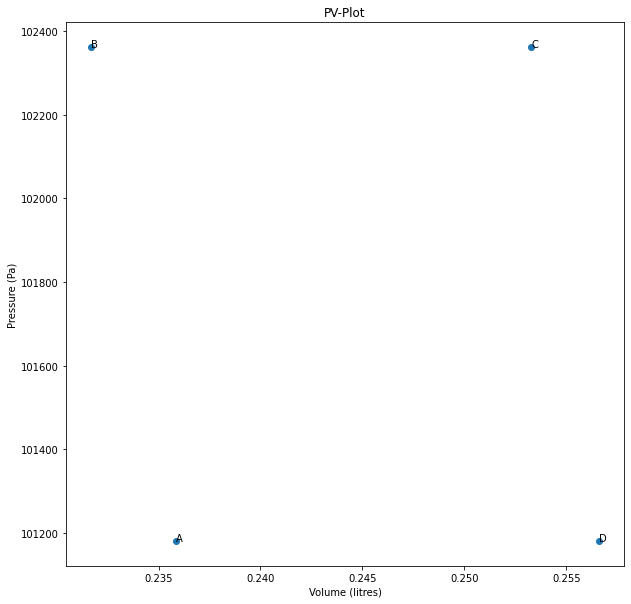

Net thermodynamic work done is 0.0536 J
Work done by gas when mass is added (B-C) is  2.182 J
Work done by gas when mass is removed (D-A) is  -2.182 J
Overall no net work is done in the addition and removal of mass, which means the net thermodynamic work is due to temperature change


In [30]:
height = np.array([33, 28, 54, 58, 32])*10**-3 #in m
temp = np.array([0, 0, 50.3, 50.3, 0]) #in Celsius
mass = 100 # Mass of weights in grams
plot(height, temp, mass)
work(height, temp, mass)

### Trial 2 (Mass 100g)

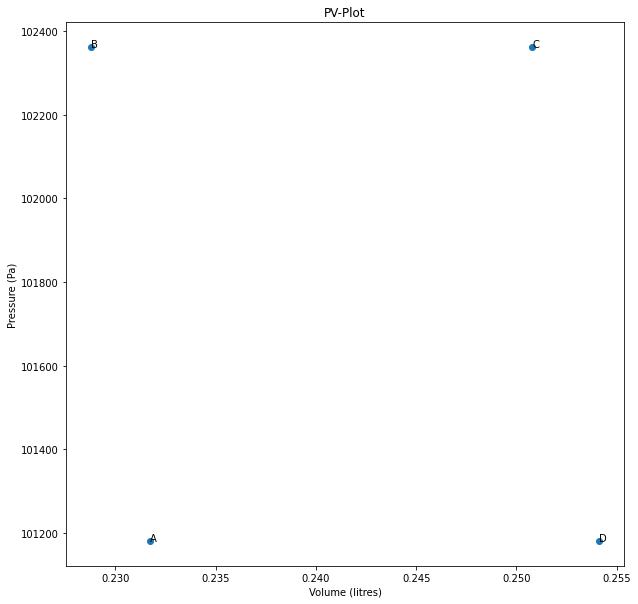

Net thermodynamic work done is 0.0536 J
Work done by gas when mass is added (B-C) is  2.224 J
Work done by gas when mass is removed (D-A) is  -2.224 J
Overall no net work is done in the addition and removal of mass, which means the net thermodynamic work is due to temperature change


In [31]:
height = np.array([28, 24.5, 51, 55, 28.5])*10**-3 #in m
temp = np.array([0, 0, 50.3, 50.3, 0]) #in Celsius
mass = 100
plot(height, temp, mass)
work(height, temp, mass)

### Trial 3 (Mass 200g)

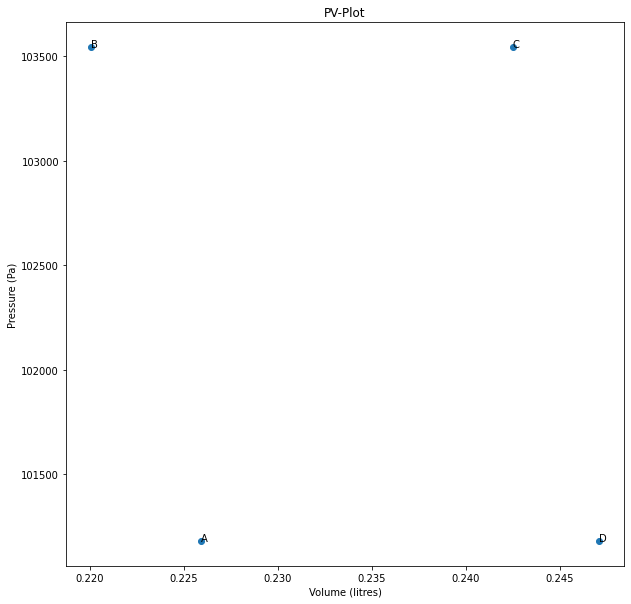

Net thermodynamic work done is 0.1067 J
Work done by gas when mass is added (B-C) is  2.266 J
Work done by gas when mass is removed (D-A) is  -2.224 J
The overall net work done during the two isobaric processes should be 0. The error might be due to gas leakage


In [32]:
height = np.array([21, 14, 41, 46.5, 20])*10**-3 #in m
temp = np.array([0, 0, 50.3, 50.3, 0]) #in Celsius
mass = 200
plot(height, temp, mass)
work(height, temp, mass)

### Trial 4 (200 grams)

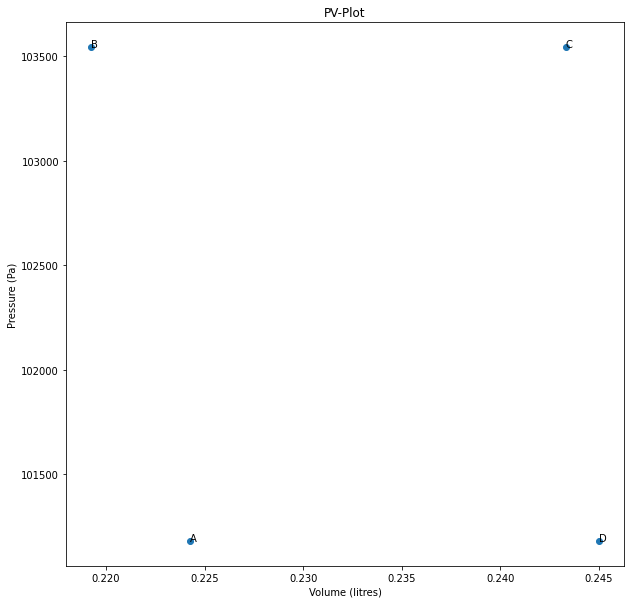

Net thermodynamic work done is 0.106 J
Work done by gas when mass is added (B-C) is  2.434 J
Work done by gas when mass is removed (D-A) is  -2.182 J
The overall net work done during the two isobaric processes should be 0. The error might be due to gas leakage


In [33]:
height = np.array([19, 13, 42, 44, 18])*10**-3 #in m
temp = np.array([0, 0, 50, 50, 0]) #in Celsius
mass = 200
plot(height, temp, mass)
work(height, temp, mass)

### Trial 5 (50 g)

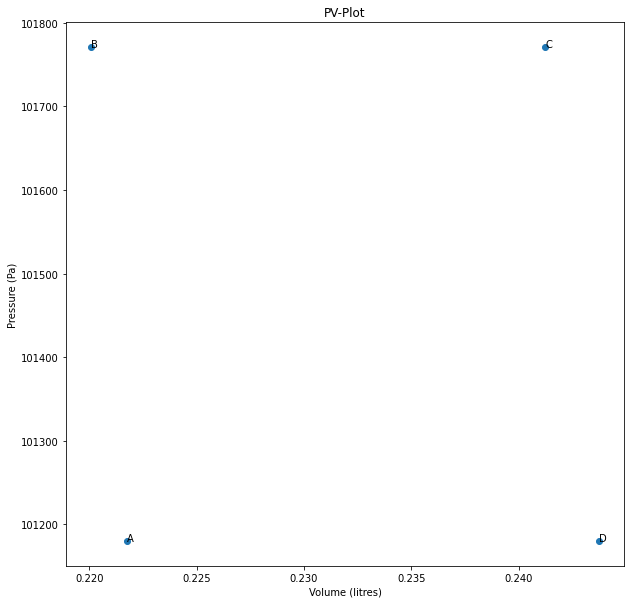

Net thermodynamic work done is 0.0267 J
Work done by gas when mass is added (B-C) is  2.14 J
Work done by gas when mass is removed (D-A) is  -2.14 J
Overall no net work is done in the addition and removal of mass, which means the net thermodynamic work is due to temperature change


In [34]:
height = np.array([16, 14, 39.5, 42.5, 17])*10**-3 #in m
temp = np.array([0, 0, 49.9, 49.9, 0]) #in Celsius
mass = 50
plot(height, temp, mass)
work(height, temp, mass)

### Trial 6 (50 g)

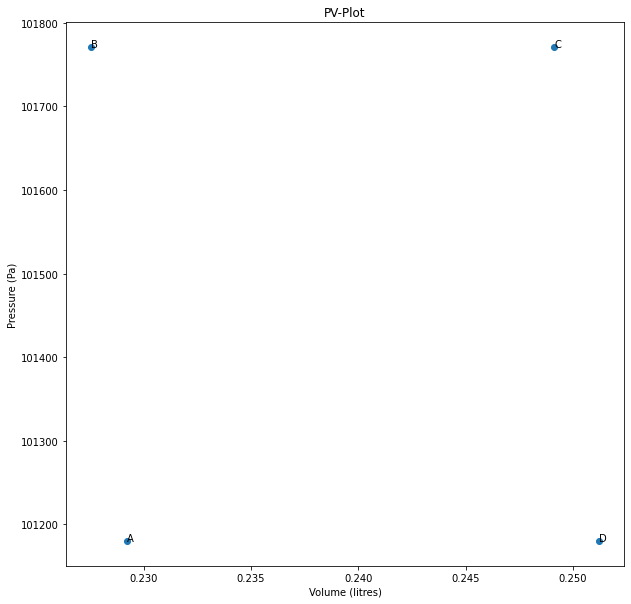

Net thermodynamic work done is 0.0267 J
Work done by gas when mass is added (B-C) is  2.182 J
Work done by gas when mass is removed (D-A) is  -2.224 J
The overall net work done during the two isobaric processes should be 0. The error might be due to gas leakage


In [35]:
height = np.array([25, 23, 49, 51.5, 25])*10**-3 #in m
temp = np.array([0, 0, 50, 50, 0]) #in Celsius
mass = 50
plot(height, temp, mass)
work(height, temp, mass)

# Experiment 2

In [36]:
def pressure_change(mass):
    force = mass*0.009806652 #Force in Newtons
    pressure_weights = force/area_of_chamber_top #N/m^2
    pressure_diff = pressure_weights/pressure_room 
    return pressure_diff
    

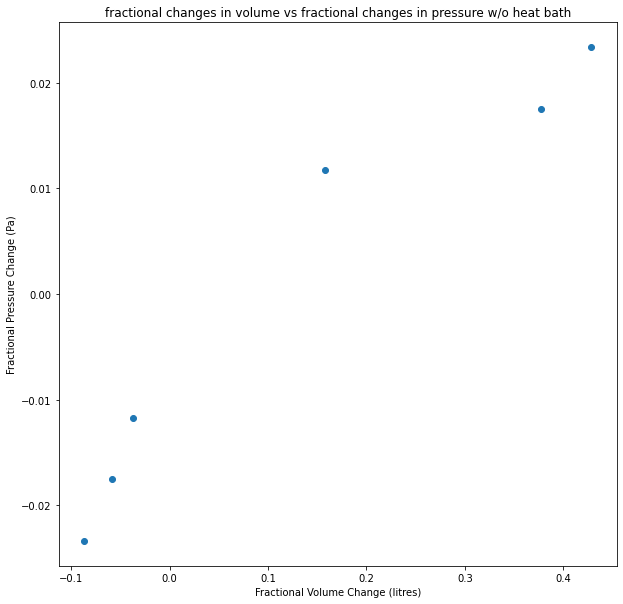

In [37]:
initial_height = np.array([71.5, 73, 72, 14, 11, 12])
height_diff = np.array([-6.5, -3, -4.5, 2, 4, 5])
mass = np.array([-200, -100, -150, 100, 150, 200])
temp = np.linspace(22.9, 22.9, 6)
fractional_volume_change = volume(height_diff)/volume(initial_height)
fractional_pressure_change = pressure_change(mass)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(fractional_volume_change, fractional_pressure_change)

ax.set_xlabel('Fractional Volume Change (litres)')
ax.set_ylabel('Fractional Pressure Change (Pa)')
ax.set_title('fractional changes in volume vs fractional changes in pressure w/o heat bath')
plt.show()
